In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
import seaborn

#### Import Data

In [2]:
# load dataset
data = pd.read_excel("C:/Users/A228744/Documents/Kaggle/Data/Telco-Customer-Churn.xlsx",sheet_name ='WA_Fn-UseC_-Telco-Customer-Chur')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data['TotalCharges'] = np.where(data['TotalCharges'] == ' ',np.nan,data['TotalCharges'])
data['TotalCharges'] = data['TotalCharges'].astype(float)

#### Removing highly correlated variables

In [4]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [5]:
data.shape

(7043, 20)

#### Categoical Variables Feature Engineering

In [6]:
cat_vars = [column for column in data.columns if (data[column].dtypes == 'O') and (column != 'customerID') and (column != 'Churn')]  
num_vars = [column for column in data.columns if (data[column].dtypes != 'O') and (column != 'customerID') and (column != 'Churn')]   

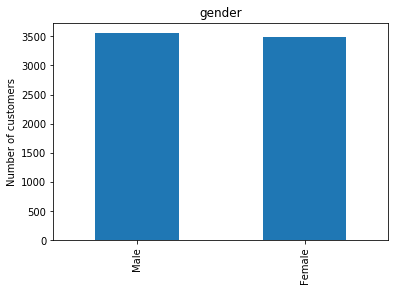

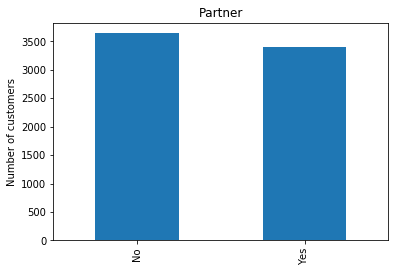

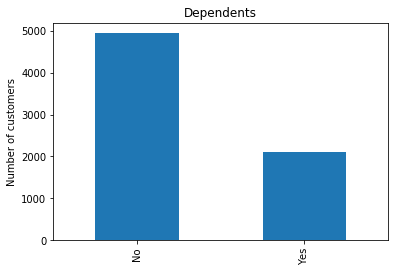

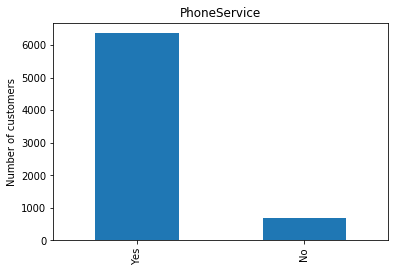

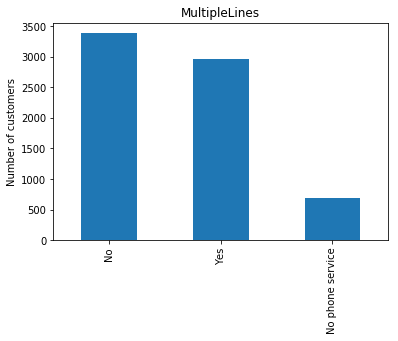

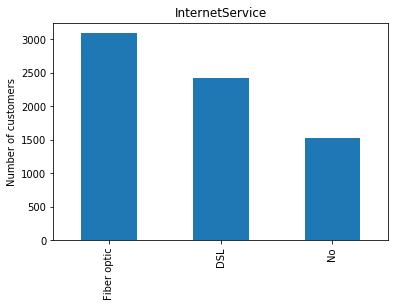

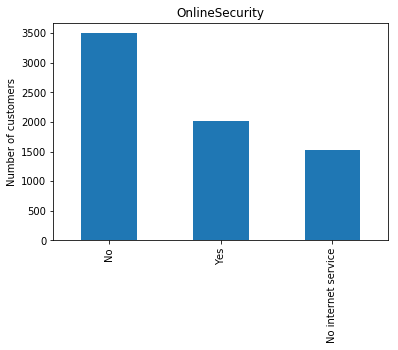

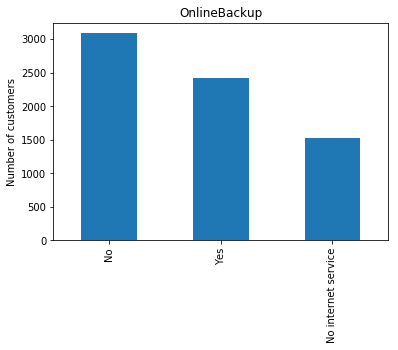

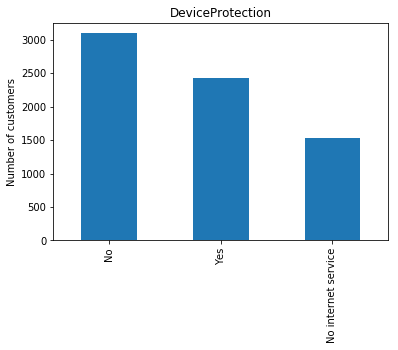

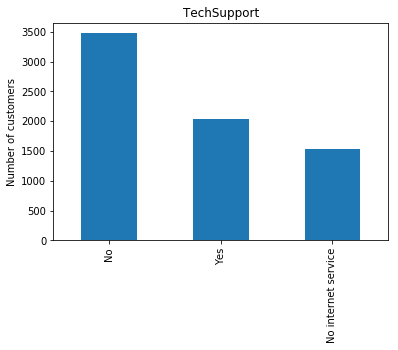

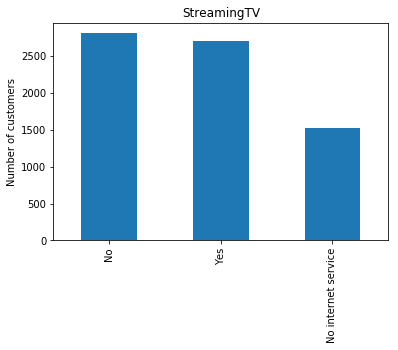

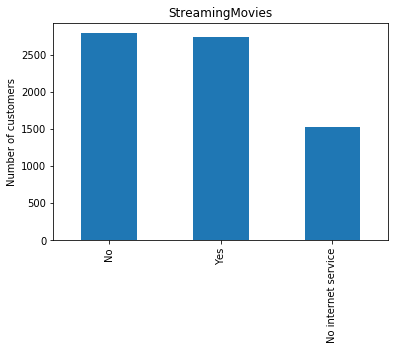

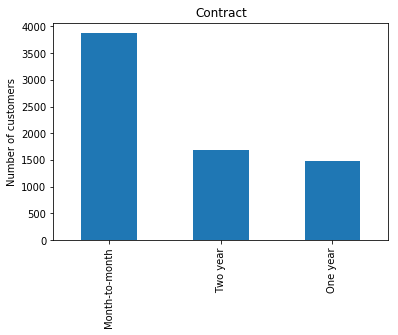

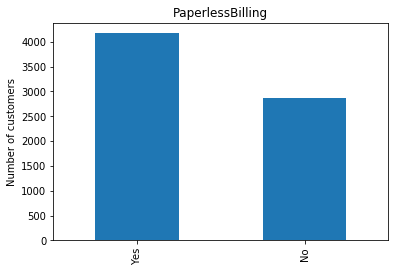

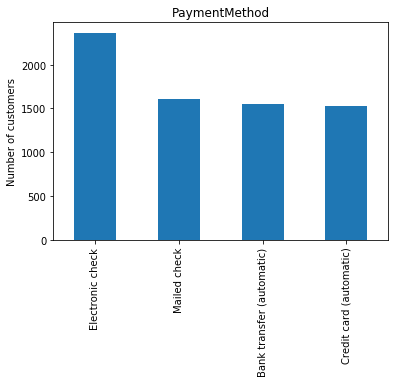

In [7]:
# let me show you what I mean by monotonic relationship between labels and target
def analyse_categorical_var_event_count(df, var):
    df = df.copy()
    df[var].value_counts().plot.bar()
    plt.title(var)
    plt.ylabel('Number of customers')
    plt.show()
    
for var in cat_vars:
    analyse_categorical_var_event_count(data, var)

In [8]:
fe_cat_vars = ['Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [9]:
data_fe = pd.get_dummies(data[num_vars+cat_vars], prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

#### Numeric Varibales Feature Engineering 

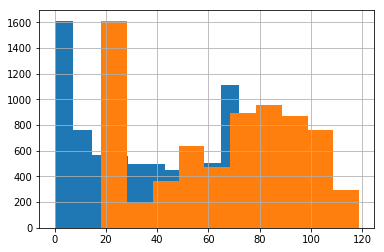

In [10]:
# let me show you what I mean by monotonic relationship between labels and target
def analyse_numeric_var_dist(df, var):
    df = df.copy()
    df[var].hist()
    
for var in num_vars[1:]:
    analyse_numeric_var_dist(data, var)

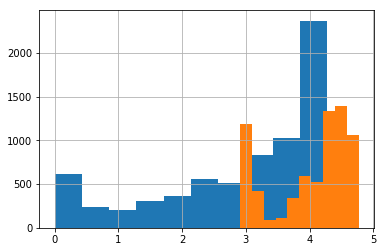

In [11]:
# let me show you what I mean by monotonic relationship between labels and target
def analyse_numeric_var_dist_trans(df, var):
    df = df.copy()
    (np.log(df[var][df[var] > 0])).hist()
    
for var in num_vars[1:]:
    analyse_numeric_var_dist_trans(data, var)

In [12]:
for var in num_vars[1:]:
    print(var)
    print(data[var].describe())
    print(' ')

tenure
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
 
MonthlyCharges
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64
 


In [13]:
# Calculate optimal bin size
def optimal_bin_range(df,v):
    h = 2*(df[v].quantile (0.75) - df[v].quantile (0.25))*(float(len(df[v])))**(1/3)
    optimal_range = (df[v].max()-df[v].min())/h
    return (optimal_range)

In [14]:
for var in num_vars[1:]:
    print(var)
    print(optimal_bin_range(data,var))
    print(' ')

tenure
0.04082806269114667
 
MonthlyCharges
0.048233704850549695
 


In [15]:
data_fe['MonthlyChargesBin'] = pd.qcut(data['MonthlyCharges'], 10)

In [16]:
data_fe['tenureBin'] = pd.qcut(data['tenure'], 10)

#### Redo Correlation Test

In [17]:
pandas_profiling.ProfileReport(data_fe)

Number of variables,46
Number of observations,7043
Total Missing (%),0.0%
Total size in memory,461.2 KiB
Average record size in memory,67.1 B
Numeric,2
Categorical,0
Boolean,35
Date,0
Text (Unique),0
Rejected,7
